<a href="https://colab.research.google.com/github/smora2/MASAR_Bootcamp/blob/main/s03a_unsupervised_clustering_kmeans_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning | Clustering (K-Means)

Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

==========

## Labeled vs. Unlabeled Data

### Labeled Data

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True)
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Unlabeled Data

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
iris_df.dropna(how="all", inplace=True)
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


==========

## K-Means Clustering | Intuition (Blobs)

Scikit-Learn Clustering Module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Visualizing K-Means Clustering: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

### Creating Data

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8,random_state=101)

### Exploring Data

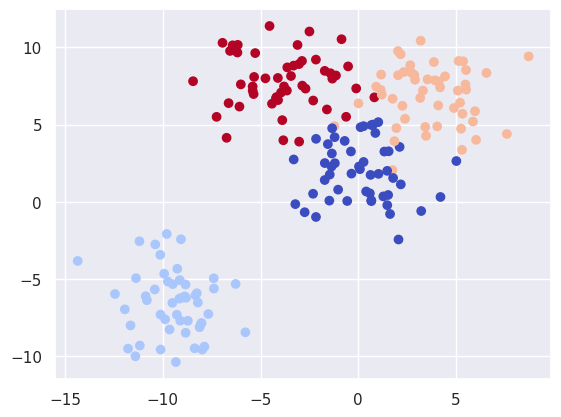

In [ ]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='coolwarm')

### Model Training & Predicting

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(5)

In [ ]:
kmeans.fit(data[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
kmeans.cluster_centers_

array([[ 0.03144989,  5.79313454],
       [-9.46941837, -6.56081545],
       [ 4.41931683,  7.10852626],
       [-4.54801232,  8.00124409],
       [ 0.09177052,  1.1410029 ]])

In [ ]:
kmeans.labels_

array([3, 2, 4, 2, 2, 1, 2, 4, 0, 4, 3, 4, 2, 0, 3, 4, 2, 4, 1, 3, 1, 4,
       0, 1, 3, 1, 1, 4, 2, 2, 3, 1, 2, 4, 4, 3, 1, 1, 1, 4, 1, 3, 0, 3,
       4, 0, 3, 4, 1, 0, 4, 3, 2, 4, 1, 0, 0, 4, 3, 2, 1, 0, 1, 3, 2, 4,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 4, 3, 4, 0, 1, 2, 1, 4, 4, 4, 3,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 3, 1, 2, 0, 1, 4, 4, 0, 0, 1, 2, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 3, 0, 0, 0, 3, 4, 3, 4, 2, 3, 4, 1, 0, 3, 3,
       4, 1, 1, 3, 2, 3, 2, 4, 1, 2, 1, 0, 0, 0, 0, 1, 3, 3, 3, 3, 4, 2,
       4, 3, 0, 2, 2, 4, 2, 4, 0, 3, 1, 3, 4, 2, 3, 4, 2, 4, 3, 0, 0, 3,
       2, 0, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 4], dtype=int32)

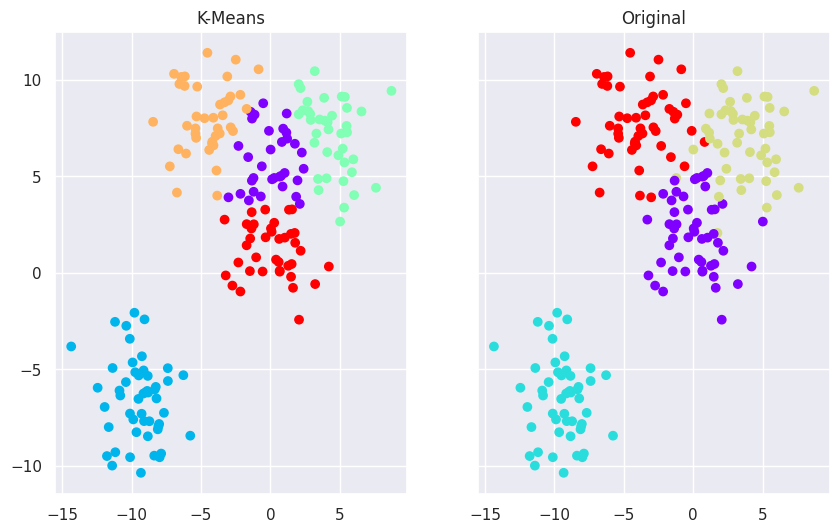

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K-Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [ ]:
X=iris_df.iloc[:,:].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

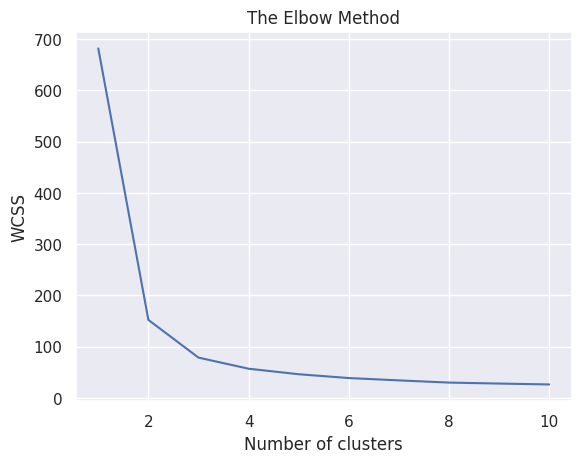

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()